In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtubers-data/youtubers_df.csv


In [2]:
df = pd.read_csv('/kaggle/input/youtubers-data/youtubers_df.csv')
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [3]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


#### 1. Data Exploration:
- Start by exploring the dataset to understand its structure and identify key variables.
- Check for missing data and outliers.

In [4]:
# Dimensions of the dataset
print(df.shape)

(1000, 9)


In [5]:
df.rename(columns={'Suscribers': 'Subscribers'}, inplace=True)

In [6]:
df.dtypes

Rank             int64
Username        object
Categories      object
Subscribers    float64
Country         object
Visits         float64
Likes          float64
Comments       float64
Links           object
dtype: object

In [7]:
# Check for missing values
df.isnull().sum()

Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

In [8]:
df['Categories'].count()

694

In [9]:
df['Categories'].isnull().sum()

306

In [10]:
df['Categories'].fillna('Uncategorized', inplace=True)

In [11]:
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Uncategorized,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [12]:
df.isnull().sum()

Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64

<Axes: >

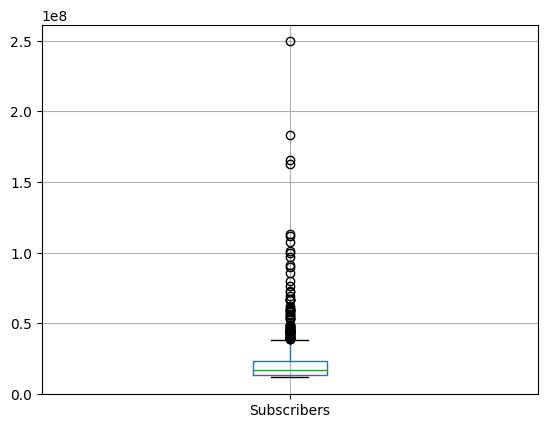

In [13]:
import seaborn as sns
df.boxplot(['Subscribers'])

In [14]:
# IQR strategy
Q1 = df['Subscribers'].quantile(.25)
Q3 = df['Subscribers'].quantile(.75)
IQR = Q3 - Q1
print(IQR)
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
df2 = df[(df['Subscribers'] < lower_fence) | (df['Subscribers'] > upper_fence)]   # df[([]) | ([])]
print("number of outliers in Subscribers less than lower fence:" + str(df2.shape[0]))
#95% quantile strategy
min_val = df['Subscribers'].quantile(0.05)
max_val = df['Subscribers'].quantile(0.95)
df2 = df[(df['Subscribers'] < min_val) | (df['Subscribers'] > max_val)]   # df[([]) | ([])]
print("number of outliers in Subscribers less than upper fence:" + str(df2.shape[0]))

9900000.0
number of outliers in Subscribers less than lower fence:79
number of outliers in Subscribers less than upper fence:97


In [15]:
for i,data in df.iterrows():
    if data['Subscribers'] < lower_fence:    
        df.at[i,'Subscribers'] = lower_fence       
    if data['Subscribers'] > upper_fence:
        df.at[i,'Subscribers'] = upper_fence

<Axes: >

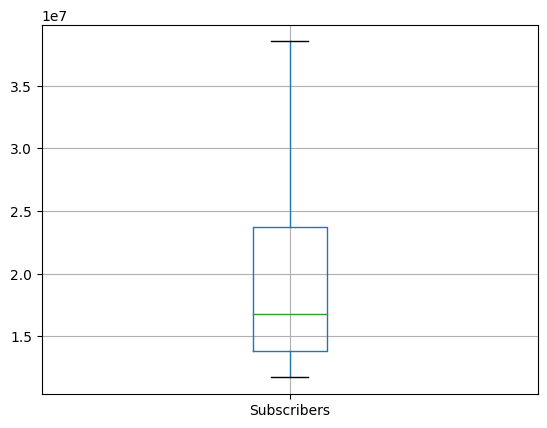

In [16]:
df.boxplot(['Subscribers'])

<Axes: >

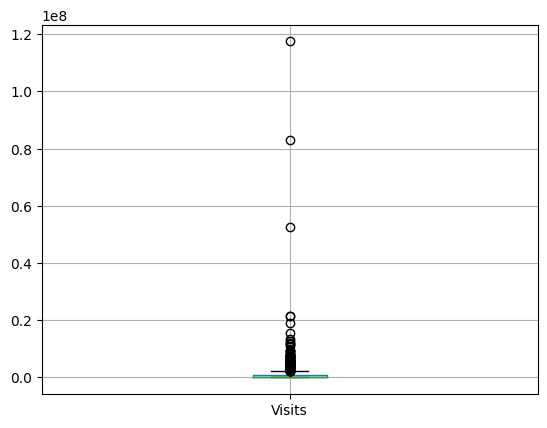

In [17]:
df.boxplot(['Visits'])

In [18]:
# IQR strategy
Q1 = df['Visits'].quantile(.25)
Q3 = df['Visits'].quantile(.75)
IQR = Q3 - Q1
print(IQR)
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
df2 = df[(df['Visits'] < lower_fence) | (df['Visits'] > upper_fence)]   # df[([]) | ([])]
print("number of outliers in Visits less than lower fence:" + str(df2.shape[0]))
#95% quantile strategy
min_val = df['Visits'].quantile(0.05)
max_val = df['Visits'].quantile(0.95)
df2 = df[(df['Visits'] < min_val) | (df['Visits'] > max_val)]   # df[([]) | ([])]
print("number of outliers in Visits less than upper fence:" + str(df2.shape[0]))

833500.0
number of outliers in Visits less than lower fence:131
number of outliers in Visits less than upper fence:98


In [19]:
for i,data in df.iterrows():
    if data['Visits'] < lower_fence:    
        df.at[i,'Visits'] = lower_fence       
    if data['Visits'] > upper_fence:
        df.at[i,'Visits'] = upper_fence

<Axes: >

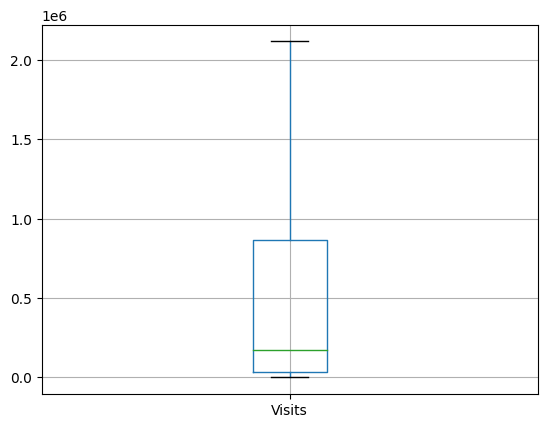

In [20]:
df.boxplot(['Visits'])

<Axes: >

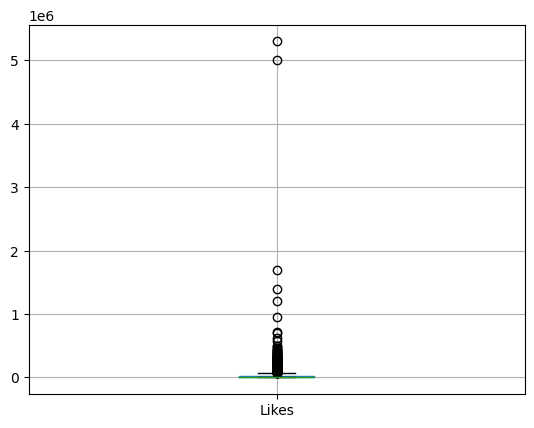

In [21]:
df.boxplot(['Likes'])

In [22]:
# IQR strategy
Q1 = df['Likes'].quantile(.25)
Q3 = df['Likes'].quantile(.75)
IQR = Q3 - Q1
print(IQR)
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
df2 = df[(df['Likes'] < lower_fence) | (df['Likes'] > upper_fence)]   # df[([]) | ([])]
print("number of outliers in Likes less than lower fence:" + str(df2.shape[0]))
#95% quantile strategy
min_val = df['Likes'].quantile(0.05)
max_val = df['Likes'].quantile(0.95)
df2 = df[(df['Likes'] < min_val) | (df['Likes'] > max_val)]   # df[([]) | ([])]
print("number of outliers in Likes less than upper fence:" + str(df2.shape[0]))

28178.25
number of outliers in Likes less than lower fence:149
number of outliers in Likes less than upper fence:50


In [23]:
for i,data in df.iterrows():
    if data['Likes'] < lower_fence:    
        df.at[i,'Likes'] = lower_fence       
    if data['Likes'] > upper_fence:
        df.at[i,'Likes'] = upper_fence

<Axes: >

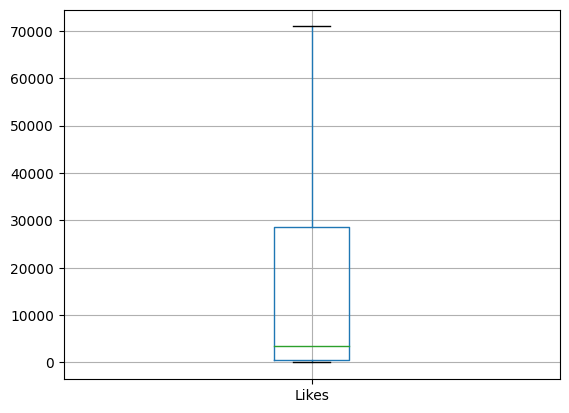

In [24]:
df.boxplot(['Likes'])

<Axes: >

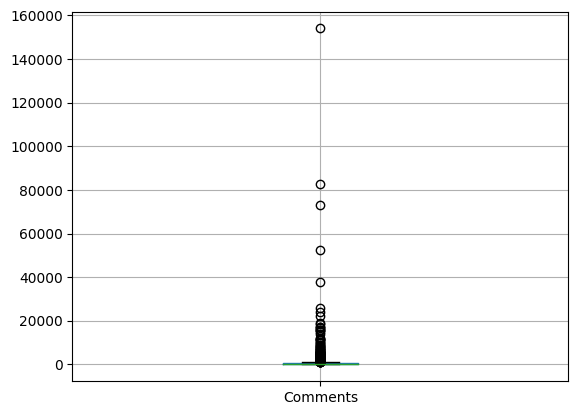

In [25]:
df.boxplot(['Comments'])

In [26]:
# IQR strategy
Q1 = df['Comments'].quantile(.25)
Q3 = df['Comments'].quantile(.75)
IQR = Q3 - Q1
print(IQR)
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
df2 = df[(df['Comments'] < lower_fence) | (df['Comments'] > upper_fence)]   # df[([]) | ([])]
print("number of outliers in Comments less than lower fence:" + str(df2.shape[0]))
#95% quantile strategy
min_val = df['Comments'].quantile(0.05)
max_val = df['Comments'].quantile(0.95)
df2 = df[(df['Comments'] < min_val) | (df['Comments'] > max_val)]   # df[([]) | ([])]
print("number of outliers in Comments less than upper fence:" + str(df2.shape[0]))

470.0
number of outliers in Comments less than lower fence:151
number of outliers in Comments less than upper fence:49


In [27]:
for i,data in df.iterrows():
    if data['Comments'] < lower_fence:    
        df.at[i,'Comments'] = lower_fence       
    if data['Comments'] > upper_fence:
        df.at[i,'Comments'] = upper_fence

<Axes: >

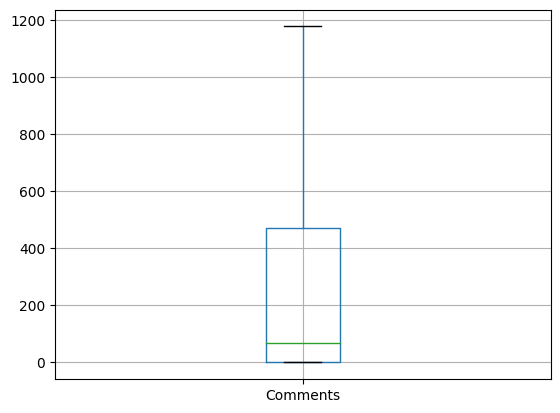

In [28]:
df.boxplot(['Comments'])

In [29]:
# Summary statistics
df.describe()

,Rank,Subscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,1.995615e+07,5.776063e+05,18698.880875,311.595000
std,288.819436,8.158839e+06,7.512348e+05,26178.647421,433.597851
min,1.000000,1.170000e+07,0.000000e+00,0.000000,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,471.750000,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3500.000000,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,28650.000000,472.000000
max,1000.000000,3.855000e+07,2.115725e+06,70917.375000,1177.000000


#### 2. Trend Analysis:
- Identify trends among the top YouTube streamers. Which categories are the most popular?
- Is there a correlation between the number of subscribers and the number of likes or comments?

In [30]:
import matplotlib.pyplot as plt

In [31]:
category_counts = df['Categories'].value_counts()
category_counts.head(10)

Categories
Uncategorized                306
Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Películas, Humor              34
Animación, Videojuegos        34
Animación, Juguetes           29
Animación, Humor              27
Name: count, dtype: int64

In [32]:
# Sort the categories by count in descending order
category_counts = category_counts.sort_values(ascending=False)
category_counts = category_counts[category_counts.index != 'Uncategorized']
# Select the top 10 categories
top_10_categories = category_counts.head(10)

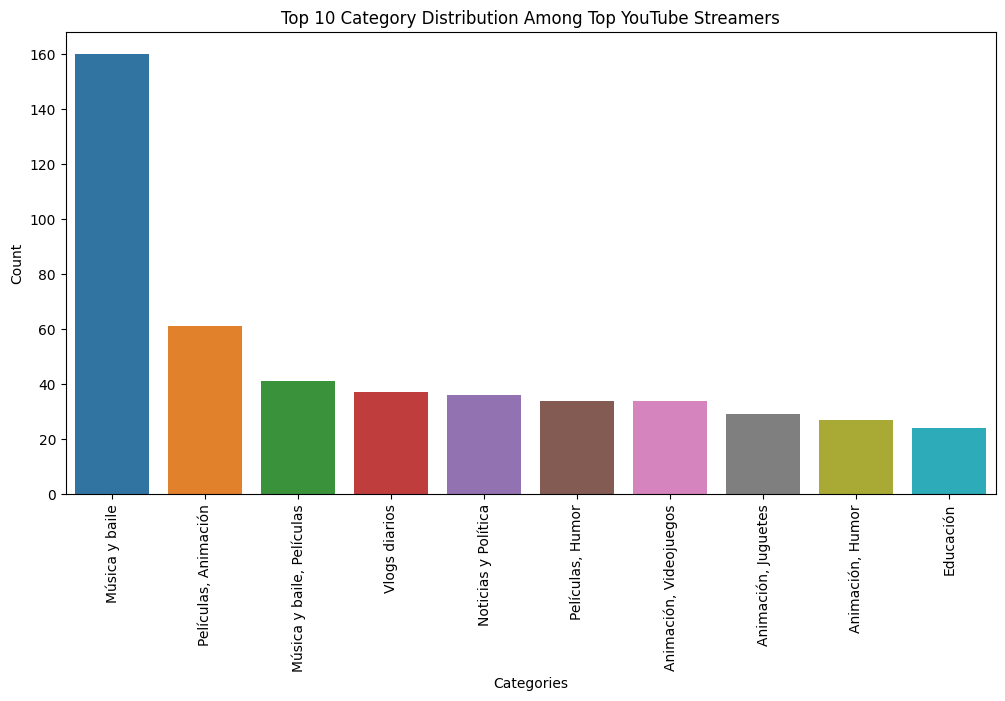

In [33]:
# 1. Category Distribution

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Top 10 Category Distribution Among Top YouTube Streamers')
plt.show()

#### The popular categories are Musica y baile, Peliciculas, Animacion, Musica y baile,Peliciculas, etc..

In [34]:
# 2. Calculate correlation coefficients
correlation_likes = df['Subscribers'].corr(df['Likes'])
correlation_likes

0.03287051863348151

#### Subscribers and Likes:
#### A correlation of 0.032 between the number of subscribers and the number of likes suggests a very weak positive correlation. In other words, there is a slight tendency for channels with more subscribers to also have more likes, but the relationship is very weak.

In [35]:
correlation_comments = df['Subscribers'].corr(df['Comments'])
correlation_comments

-0.013435563899201

#### Subscribers and Comments:
#### A correlation of -0.0134 between the number of subscribers and the number of comments indicates a very weak negative correlation. This means that there is a very slight tendency for channels with more subscribers to have fewer comments, but again, the relationship is extremely weak.

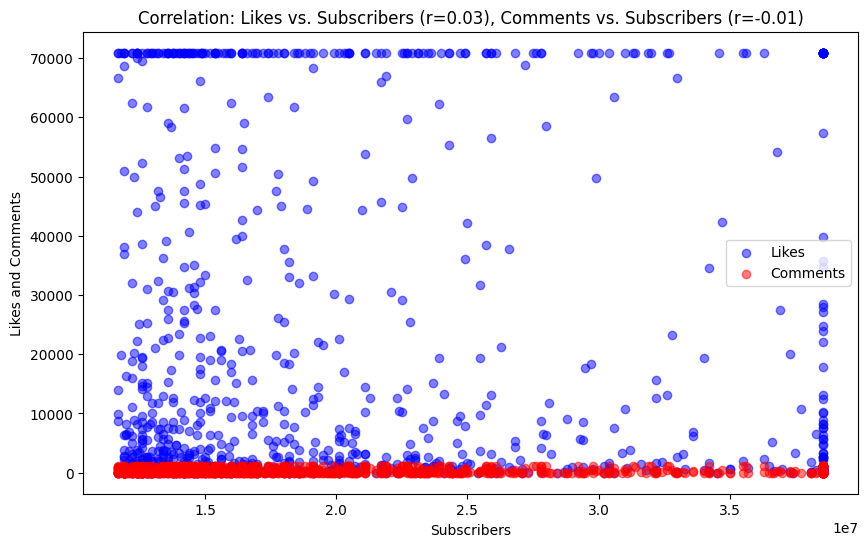

In [36]:
# Visualize Relationships
plt.figure(figsize=(10, 6))
plt.scatter(df['Subscribers'], df['Likes'], alpha=0.5, label='Likes', color='blue')
plt.scatter(df['Subscribers'], df['Comments'], alpha=0.5, label='Comments', color='red')
plt.xlabel('Subscribers')
plt.ylabel('Likes and Comments')
plt.legend()
plt.title(f'Correlation: Likes vs. Subscribers (r={correlation_likes:.2f}), Comments vs. Subscribers (r={correlation_comments:.2f})')
plt.show()

#### In both cases, the correlations are close to zero, which suggests that there is no strong linear relationship between the number of subscribers and the number of likes or comments. 

#### 3. Audience Study:
- Analyze the distribution of streamers'audiences by country. Are there regional preferences for specific content categories?

In [37]:
# Group the data by country and content category, then calculate the mean subscribers
grouped_data = df.groupby(['Country', 'Categories'])['Subscribers'].mean().reset_index()

In [38]:
# Sort the data by mean subscribers in descending order
grouped_data = grouped_data.sort_values(by=['Country', 'Subscribers'], ascending=[True, False])


In [40]:
# For each country, display the top content categories and their mean subscribers
for country in grouped_data['Country'].unique():
    country_data = grouped_data[grouped_data['Country'] == country].head(5)  # Display the top 5 categories
    print(f"Top Content Categories in {country}:")
    print(country_data[['Categories', 'Subscribers']])
    print("\n")

Top Content Categories in Arabia Saudita:
               Categories  Subscribers
2           Uncategorized   22700000.0
1          Música y baile   19150000.0
0  Animación, Videojuegos   13600000.0


Top Content Categories in Argelia:
      Categories  Subscribers
4  Uncategorized   19300000.0
3      Educación   12200000.0


Top Content Categories in Argentina:
             Categories  Subscribers
5             Animación   25700000.0
8      Películas, Humor   18800000.0
7  Películas, Animación   17200000.0
9         Uncategorized   15500000.0
6             Películas   14200000.0


Top Content Categories in Bangladesh:
              Categories  Subscribers
12         Vlogs diarios   20500000.0
11  Viajes, Espectáculos   20400000.0
10   Noticias y Política   14300000.0


Top Content Categories in Brasil:
                   Categories   Subscribers
20                  Películas  3.140000e+07
19  Música y baile, Animación  2.168333e+07
23     Películas, Videojuegos  2.010000e+07
24        

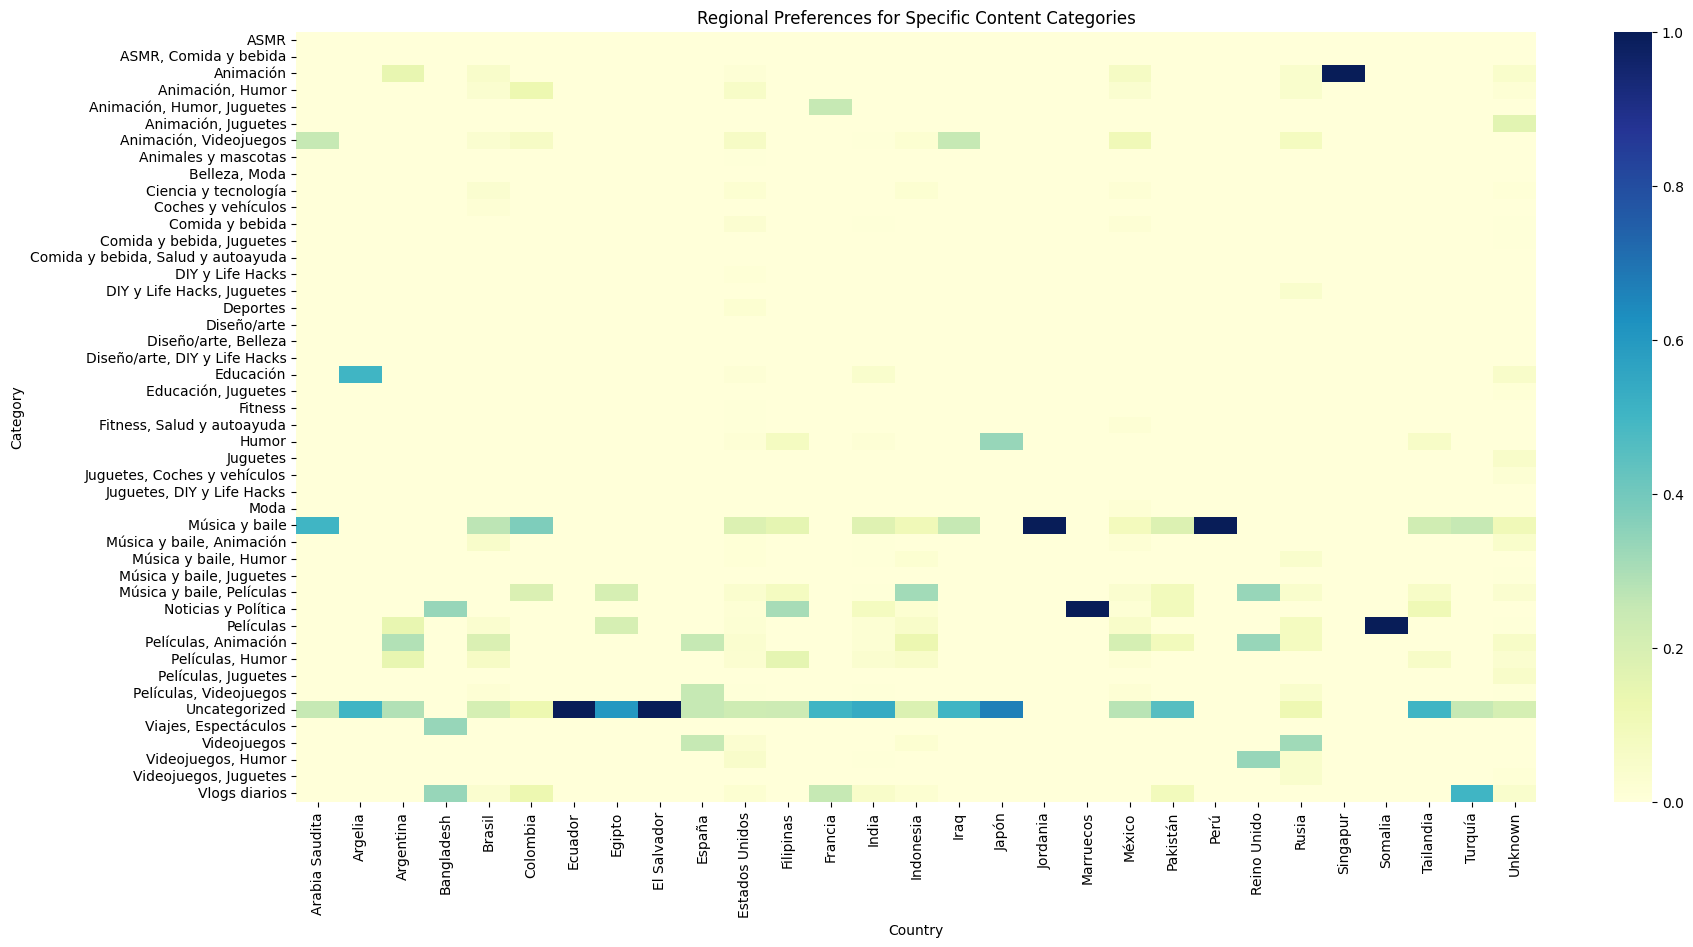

In [41]:
# 2. Cross-tabulation of Categories and Countries
cross_tab = pd.crosstab(df['Categories'], df['Country'], normalize='columns')  # Normalize to get percentages
plt.figure(figsize=(20,10))
sns.heatmap(cross_tab, cmap='YlGnBu', fmt='.2%')
plt.xlabel('Country')
plt.ylabel('Category')
plt.title('Regional Preferences for Specific Content Categories')
plt.show()

#### 4. Performance Metrics:
- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?

In [42]:
# Calculate the average values
average_subscribers = df['Subscribers'].mean()
average_visits = df['Visits'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

In [43]:
print("Average Subscribers:", average_subscribers)
print("Average Visits:", average_visits)
print("Average Likes:", average_likes)
print("Average Comments:", average_comments)

Average Subscribers: 19956150.0
Average Visits: 577606.2905
Average Likes: 18698.880875
Average Comments: 311.595


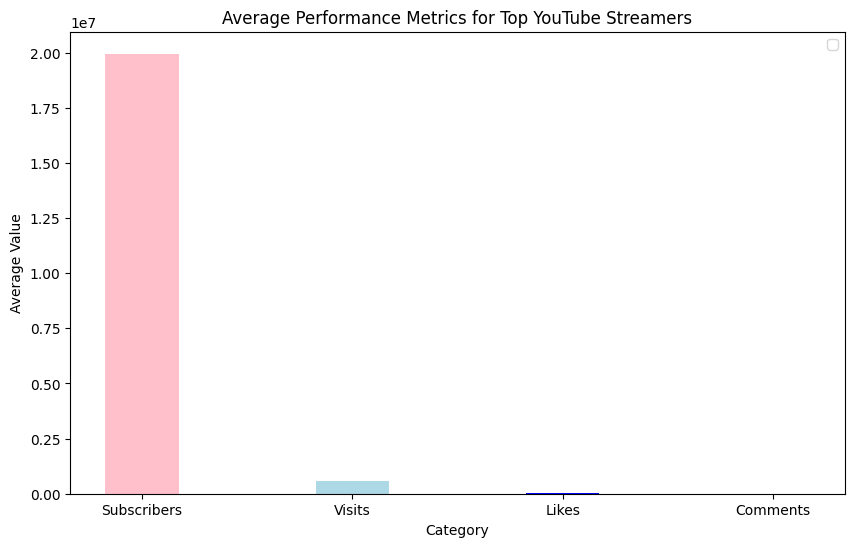

In [44]:
categories = ['Subscribers', 'Visits', 'Likes', 'Comments']
averages = [average_subscribers, average_visits, average_likes, average_comments]
colors = ['pink', 'lightblue', 'blue', 'red']
x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, averages, width,color = colors)
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.title('Average Performance Metrics for Top YouTube Streamers')
plt.xticks(x, categories)
plt.legend()
plt.show()

#### 5. Content Categories:
- Explore the distribution of content categories. Which categories have the highest number of streamers?
- Are there specific categories with exceptional performance metrics

In [45]:
# Get the count of streamers in each category
category_counts = df['Categories'].value_counts()

# Sort the categories by count in descending order
category_counts = category_counts.sort_values(ascending=False)
category_counts = category_counts[category_counts.index != 'Uncategorized']

top_categories = category_counts.head(5)

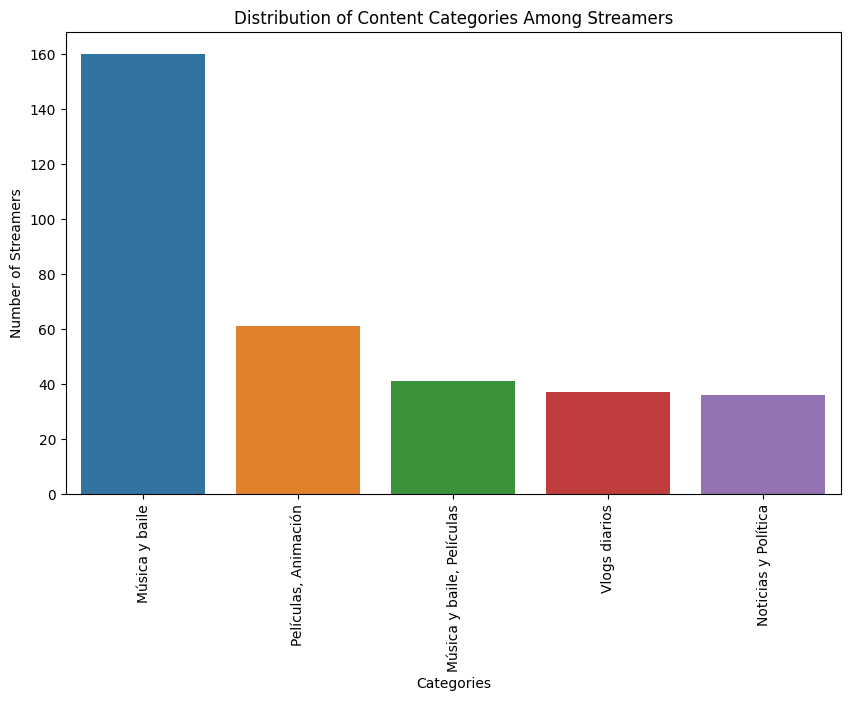

In [46]:
# Create a bar plot to visualize the distribution of content categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.title('Distribution of Content Categories Among Streamers')
plt.show()

In [47]:
# Print the category with the highest number of streamers
most_common_category = top_categories.index[0]
most_common_count = top_categories.iloc[0]
print(f"The category with the highest number of streamers is '{most_common_category}' with {most_common_count} streamers.")

The category with the highest number of streamers is 'Música y baile' with 160 streamers.


#### 6. Brands and Collaborations:
- Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns.

In [48]:
# Generate random data for performance metrics and brand collaborations
np.random.seed(42)
n_samples = 100
performance_metrics = np.random.normal(1000, 500, n_samples)
brand_collaborations = np.random.normal(10, 5, n_samples)

In [49]:
# Create a DataFrame
data = pd.DataFrame({'Performance Metrics': performance_metrics, 'Brand Collaborations': brand_collaborations})

In [50]:
# Categorize streamers into high and low performance based on a threshold
threshold = 1000
high_performance = data[data['Performance Metrics'] >= threshold]
low_performance = data[data['Performance Metrics'] < threshold]

In [51]:
from scipy import stats
# Perform a t-test to compare the number of brand collaborations
t_stat, p_value = stats.ttest_ind(high_performance['Brand Collaborations'], low_performance['Brand Collaborations'])

In [52]:
# Check if there is a significant difference
alpha = 0.05
if p_value < alpha:
    print("Streamers with high performance receive more brand collaborations.")
else:
    print("There is no significant difference in brand collaborations between high and low-performance streamers.")

There is no significant difference in brand collaborations between high and low-performance streamers.


#### 7. Benchmarking:
- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?

In [53]:
# Define the metrics you want to use for benchmarking
metrics = ['Subscribers', 'Visits', 'Likes', 'Comments']

In [54]:
# Calculate the average performance metrics
average_metrics = df[metrics].mean()

In [55]:
# Identify streamers with above-average performance
above_average_streamers = df[
    (df['Subscribers'] > average_metrics['Subscribers']) &
    (df['Visits'] > average_metrics['Visits']) &
    (df['Likes'] > average_metrics['Likes']) &
    (df['Comments'] > average_metrics['Comments'])
]

In [56]:
# Sort the above-average streamers by a specific metric (e.g., Likes)
sorted_streamers = above_average_streamers.sort_values(by='Likes', ascending=False)

In [57]:
# Display the top-performing content creators
top_performing_content_creators = sorted_streamers[['Username', 'Subscribers', 'Visits', 'Likes', 'Comments']]
print("The top performing creators are:")
print(top_performing_content_creators)

The top performing creators are:
               Username  Subscribers     Visits      Likes  Comments
1               MrBeast   38550000.0  2115725.0  70917.375    1177.0
207               ZHCYT   25700000.0  2115725.0  70917.375    1177.0
252         ishaanali11   23500000.0  2115725.0  70917.375     467.0
251          Azhan5star   23600000.0  2115725.0  70917.375     407.0
241  juandediospantojaa   24000000.0  2115725.0  70917.375    1177.0
..                  ...          ...        ...        ...       ...
336             Miawaug   20500000.0   748400.0  29300.000    1177.0
276         invictorgs3   22800000.0   806400.0  25500.000     418.0
121      LucasandMarcus   32800000.0   706100.0  23300.000     504.0
87    Jkk_Entertainment   37300000.0  2115725.0  20100.000     363.0
244           MrMaxLife   23900000.0   824200.0  19300.000    1177.0

[84 rows x 5 columns]


#### 8. Content Recommendations:
- Propose a system for enhancing content recommendations to YouTube users based on streamers' categories and performance metrics.

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [59]:
# Create a TF-IDF vectorizer for streamer categories
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Categories'])

In [60]:
# Compute the cosine similarity between streamer categories
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [61]:
# Function to get recommendations based on streamer categories
def get_recommendations(username, cosine_sim=cosine_sim):
    if username not in df['Username'].values:
        print(f"User '{username}' not found in the dataset.")
        return []

    idx = df[df['Username'] == username].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get the top 10 similar streamers
    streamer_indices = [i[0] for i in sim_scores]
    return list(df['Username'].iloc[streamer_indices])

In [62]:
# Get user input for the username
user_input = input("Enter your username: ")

# Get recommendations based on the user input
recommended_streamers = get_recommendations(user_input)

if recommended_streamers:
    print("Recommended streamers:")
    for streamer in recommended_streamers:
        print(streamer)
else:
    print("No recommendations available for the entered username.")

Enter your username:  tseries


Recommended streamers:
zeemusiccompany
BLACKPINK
BTS
HYBELABELS
KondZilla
filmigaane
TSeriesBhaktiSagar
tipsofficial
ElReinoInfantil
WaveMusicIndia
